### Two-week Meteorological Data Analysis in Muntinlupa using a DHT11 sensor

Below are the codes used to proccess the data collected through a DHT11 sensor stationed in Muntinlupa for a period of 2 weeks.

In [19]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter
from datetime import datetime, timedelta

In [20]:
class Datapoint:
    date = datetime(2023, 10, 19, 12, 0, 0, 0)
    humi = -1
    temp = -1

    def __init__(self, _date, _humi, _temp):
        self.date = _date
        self.humi = _humi
        self.temp = _temp

rows = []
datapoints = []
date_format = '%m/%d/%Y_%H:%M:%S'

# Import data from file
with open("DSP Project Midterms - Sheet1.csv", 'r') as file:
    csvreader = csv.reader(file)
    header = next(csvreader)
    for row in csvreader:
        rows.append(row)
        dp_date = Datapoint(datetime.strptime(row[0],date_format), float(row[1]), float(row[2]))
        datapoints.append(dp_date)

In [21]:
start = 0
count = len(rows)
humi_ave = temp_ave = interval_ave = 0
max_interval = 15
min_interval = 15
missing_mins = 0
time_jumps = 0

In [22]:
# Proccessing data (1)
for i in range(start+1, count):
    # Time interval between datapoints
    interval = (datapoints[i].date - datapoints[i-1].date).seconds / 60

    humi_ave += datapoints[i-1].humi
    temp_ave += datapoints[i-1].temp
    interval_ave += interval

In [23]:
# Calculating averages
humi_ave /= (count - start)
temp_ave /= (count - start)
interval_ave /= (count - start)

# inserted_data = insert_interval(datapoints[start:count], timedelta(seconds=900))
inserted_data = datapoints
collection_period = datapoints[len(datapoints)-1].date - datapoints[0].date

In [24]:
print()
print("len:", len(datapoints))
print("Ave_humi:", humi_ave, "Ave_temp:", temp_ave)
print("Ave_inter:", interval_ave, "mins")
print("Total Data Collection period: ", datapoints[0].date.strftime("%m/%d - %H:%M:%S"), "-", datapoints[len(datapoints)-1].date.strftime("%m/%d - %H:%M:%S"), "(",collection_period.total_seconds()/3600,"hrs )")



len: 834
Ave_humi: 65.63573141486825 Ave_temp: 32.575539568345434
Ave_inter: 20.779236610711386 mins
Total Data Collection period:  10/19 - 23:52:42 - 11/02 - 00:42:35 ( 312.8313888888889 hrs )


Holder len: 833


C:\Users\AA\AppData\Local\Temp\ipykernel_21532\2314639323.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(211)


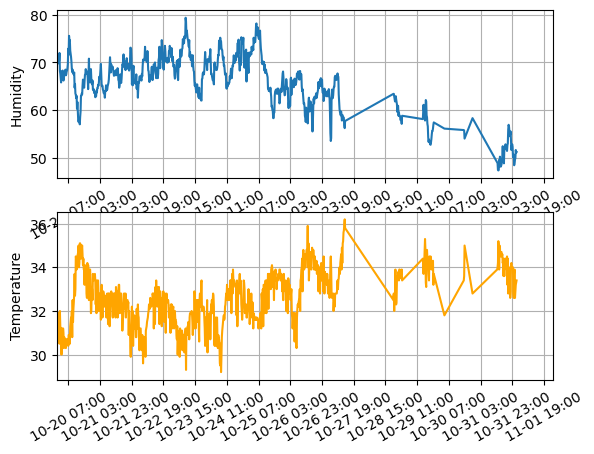

In [25]:
interval = len(inserted_data)-1
date_first = inserted_data[0].date
date_last = inserted_data[interval].date

nums = [ a for a in range(interval)]

humi = [ data.humi for data in inserted_data ]
temp = [ data.temp for data in inserted_data ]

# date_label = [ data.date.strftime("%m/%d_%H:%M") for data in inserted_data ]
date_label = []
date_holder = [ date.date for date in inserted_data ]

holder = inserted_data[0].date.strftime("%m/%d_%H:%M")
for i in range(interval):
    if i % (interval//10) == 0:
        holder = inserted_data[i].date.strftime("%M/%d_%H:%M")
    date_label.append(holder)

print("Holder len:", len(date_label))

plt.title("DHT11 Sensor Humidity and Temperature Data")
plt.subplot(211)
plt.plot(date_holder[0:interval], humi[0:interval])
plt.grid()

## Format the date into months & days
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M')) 
# Change the tick interval
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=20)) 
# Puts x-axis labels on an angle
plt.gca().xaxis.set_tick_params(rotation = 30)  
# Changes x-axis range
plt.gca().set_xbound(date_first, date_last) 
plt.ylabel("Humidity")

plt.subplot(212)
plt.plot(date_holder[0:interval], temp[0:interval], color="orange")
plt.grid()

## Format the date into months & days
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M')) 
# Change the tick interval
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=20)) 
# Puts x-axis labels on an angle
plt.gca().xaxis.set_tick_params(rotation = 30)  
# Changes x-axis range
plt.gca().set_xbound(date_first, date_last) 
plt.ylabel("Temperature")

plt.show()